In [166]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage

%matplotlib inline

In [209]:
img = mpimg.imread('ani.jpg')
img.shape

(567, 449, 3)

In [210]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray.shape

(567, 449)

In [211]:
def grayscale(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

f_gray = grayscale(img)

In [212]:
inv_img = 255.0 - gray
inv_img = np.array(inv_img, dtype=float)
print(inv_img)

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [219]:
blur = scipy.ndimage.filters.gaussian_filter(inv_img,sigma=15)

In [220]:
def dodge(front,back):
    result=front*255/(255-back)
    result[result>255]=255
    result[back==255]=255
    return result.astype('uint8')
final_img= dodge(blur,gray)

/home/el-do-rado/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


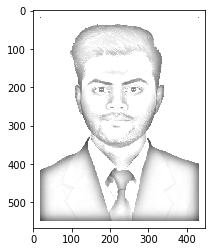

In [222]:
plt.imshow(final_img, cmap='gray')

In [223]:
plt.imsave('sketch.jpg', final_img, cmap='gray')